In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from datetime import datetime, date, time
from sklearn.model_selection import train_test_split

This is the initial EDA of the sales and shipment of products and building of models for determining the shipping cost based on the container type used to send the goods

In [2]:
df = pd.read_csv('sales.csv')

In [3]:
df

,Order ID,Customer ID,Sales Person,Order Date,Ship Date,Order Priority,SKU Code,Order Quantity,Unit Sell Price,Unit Cost Price,Discount Percent,Shipping Amount,Ship Mode,Container,Cost,Discount Amount,Discount Cost,Total Discounted Cost
0,13729,C508,Mr Robert Carlton,1/1/2017,1/3/2017,Not Specified,SKU947,9,95.99,1,8%,35.00,Express Air,Large Box,863.91,69.1128,794.7972,829.7972
1,28774,C372,Miss Roseanna Marr,1/1/2017,1/2/2017,High,SKU937,32,5.98,1,10%,4.69,Regular Air,Small Box,191.36,19.1360,172.2240,176.9140
2,9285,C212,Mr Robert Carlton,1/2/2017,1/4/2017,Critical,SKU363,3,40.98,6,6%,2.99,Regular Air,Small Box,122.94,7.3764,115.5636,118.5536
3,37537,C015,Mr Robert Carlton,1/2/2017,1/2/2017,Low,SKU052,4,291.73,58,0%,48.80,Delivery Truck,Jumbo Drum,1166.92,0.0000,1166.9200,1215.7200
4,37537,C015,Mr Robert Carlton,1/2/2017,1/4/2017,Low,SKU063,43,100.98,45,7%,45.00,Delivery Truck,Jumbo Drum,4342.14,303.9498,4038.1902,4083.1902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,49344,C494,Mr Robert Carlton,12/30/2020,12/30/2020,Low,SKU979,31,19.98,9,0%,4.00,Regular Air,Small Box,619.38,0.0000,619.3800,623.3800
8395,49344,C494,Mr Robert Carlton,12/30/2020,12/30/2020,Low,SKU883,1,832.81,14,9%,24.49,Regular Air,Medium Box,832.81,74.9529,757.8571,782.3471
8396,47815,C377,Mrs Gail Johnson,12/30/2020,12/30/2020,Not Specified,SKU114,45,13.73,5,8%,6.85,Regular Air,Wrap Bag,617.85,49.4280,568.4220,575.2720
8397,50950,C768,Mrs Gail Johnson,12/30/2020,12/30/2020,Not Specified,SKU066,6,60.98,5,6%,30.00,Delivery Truck,Jumbo Drum,365.88,21.9528,343.9272,373.9272


In [4]:
df["Customer ID"].value_counts()

C199    41
C248    38
C100    35
C131    33
C591    30
        ..
C672     1
C239     1
C560     1
C515     1
C179     1
Name: Customer ID, Length: 795, dtype: int64

In [5]:
df.describe()

,Order ID,Order Quantity,Unit Sell Price,Unit Cost Price,Shipping Amount,Cost,Discount Amount,Discount Cost,Total Discounted Cost
count,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000,8399.000000
mean,29965.183950,25.571735,89.346259,22.737826,12.838557,1846.312055,91.276222,1755.035833,1767.874390
std,17260.883221,14.481071,290.354383,92.055619,17.264052,3710.265557,219.699498,3538.264045,3545.674373
min,3.000000,1.000000,0.990000,1.000000,0.490000,1.480000,0.000000,1.465200,2.165200
25%,15011.500000,13.000000,6.480000,2.000000,3.300000,140.150000,3.787500,133.221700,138.570550
50%,29857.000000,26.000000,20.990000,4.000000,6.070000,450.890000,16.128000,427.700000,437.350000
75%,44596.000000,38.000000,85.990000,18.000000,13.990000,1781.645000,72.720750,1681.944050,1705.749900
max,59973.000000,50.000000,6783.020000,3159.000000,164.730000,88179.260000,4883.774400,88179.260000,88203.750000


In [6]:
df.shape

(8399, 18)

In [7]:
df.dtypes

Order ID                   int64
Customer ID               object
Sales Person              object
Order Date                object
Ship Date                 object
Order Priority            object
SKU Code                  object
Order Quantity             int64
Unit Sell Price          float64
Unit Cost Price            int64
Discount Percent          object
Shipping Amount          float64
Ship Mode                 object
Container                 object
Cost                     float64
Discount Amount          float64
Discount Cost            float64
Total Discounted Cost    float64
dtype: object

In [8]:
from datetime import datetime, date, time

df['Order Date'] = pd.to_datetime(df["Order Date"], errors= "coerce")
df['Ship Date'] = pd.to_datetime(df["Ship Date"], errors= "coerce")

In [9]:
df.isnull().sum()

Order ID                 0
Customer ID              0
Sales Person             0
Order Date               0
Ship Date                0
Order Priority           0
SKU Code                 0
Order Quantity           0
Unit Sell Price          0
Unit Cost Price          0
Discount Percent         0
Shipping Amount          0
Ship Mode                0
Container                0
Cost                     0
Discount Amount          0
Discount Cost            0
Total Discounted Cost    0
dtype: int64

In [10]:
df['Ship Mode'].value_counts()

Regular Air       6270
Delivery Truck    1146
Express Air        983
Name: Ship Mode, dtype: int64

In [11]:
df['SKU Code'].value_counts()[:15]

SKU042     24
SKU221     22
SKU189     22
SKU879     22
SKU228     22
SKU456     21
SKU974     20
SKU1237    20
SKU483     19
SKU072     19
SKU1034    19
SKU1203    19
SKU558     19
SKU1059    18
SKU977     18
Name: SKU Code, dtype: int64

In [12]:
df['Container'].value_counts()

Small Box     4347
Wrap Bag      1168
Small Pack     956
Jumbo Drum     624
Jumbo Box      532
Large Box      406
Medium Box     366
Name: Container, dtype: int64

Using mutual information method to check the relationship between the features and the target(**SalePrice**)

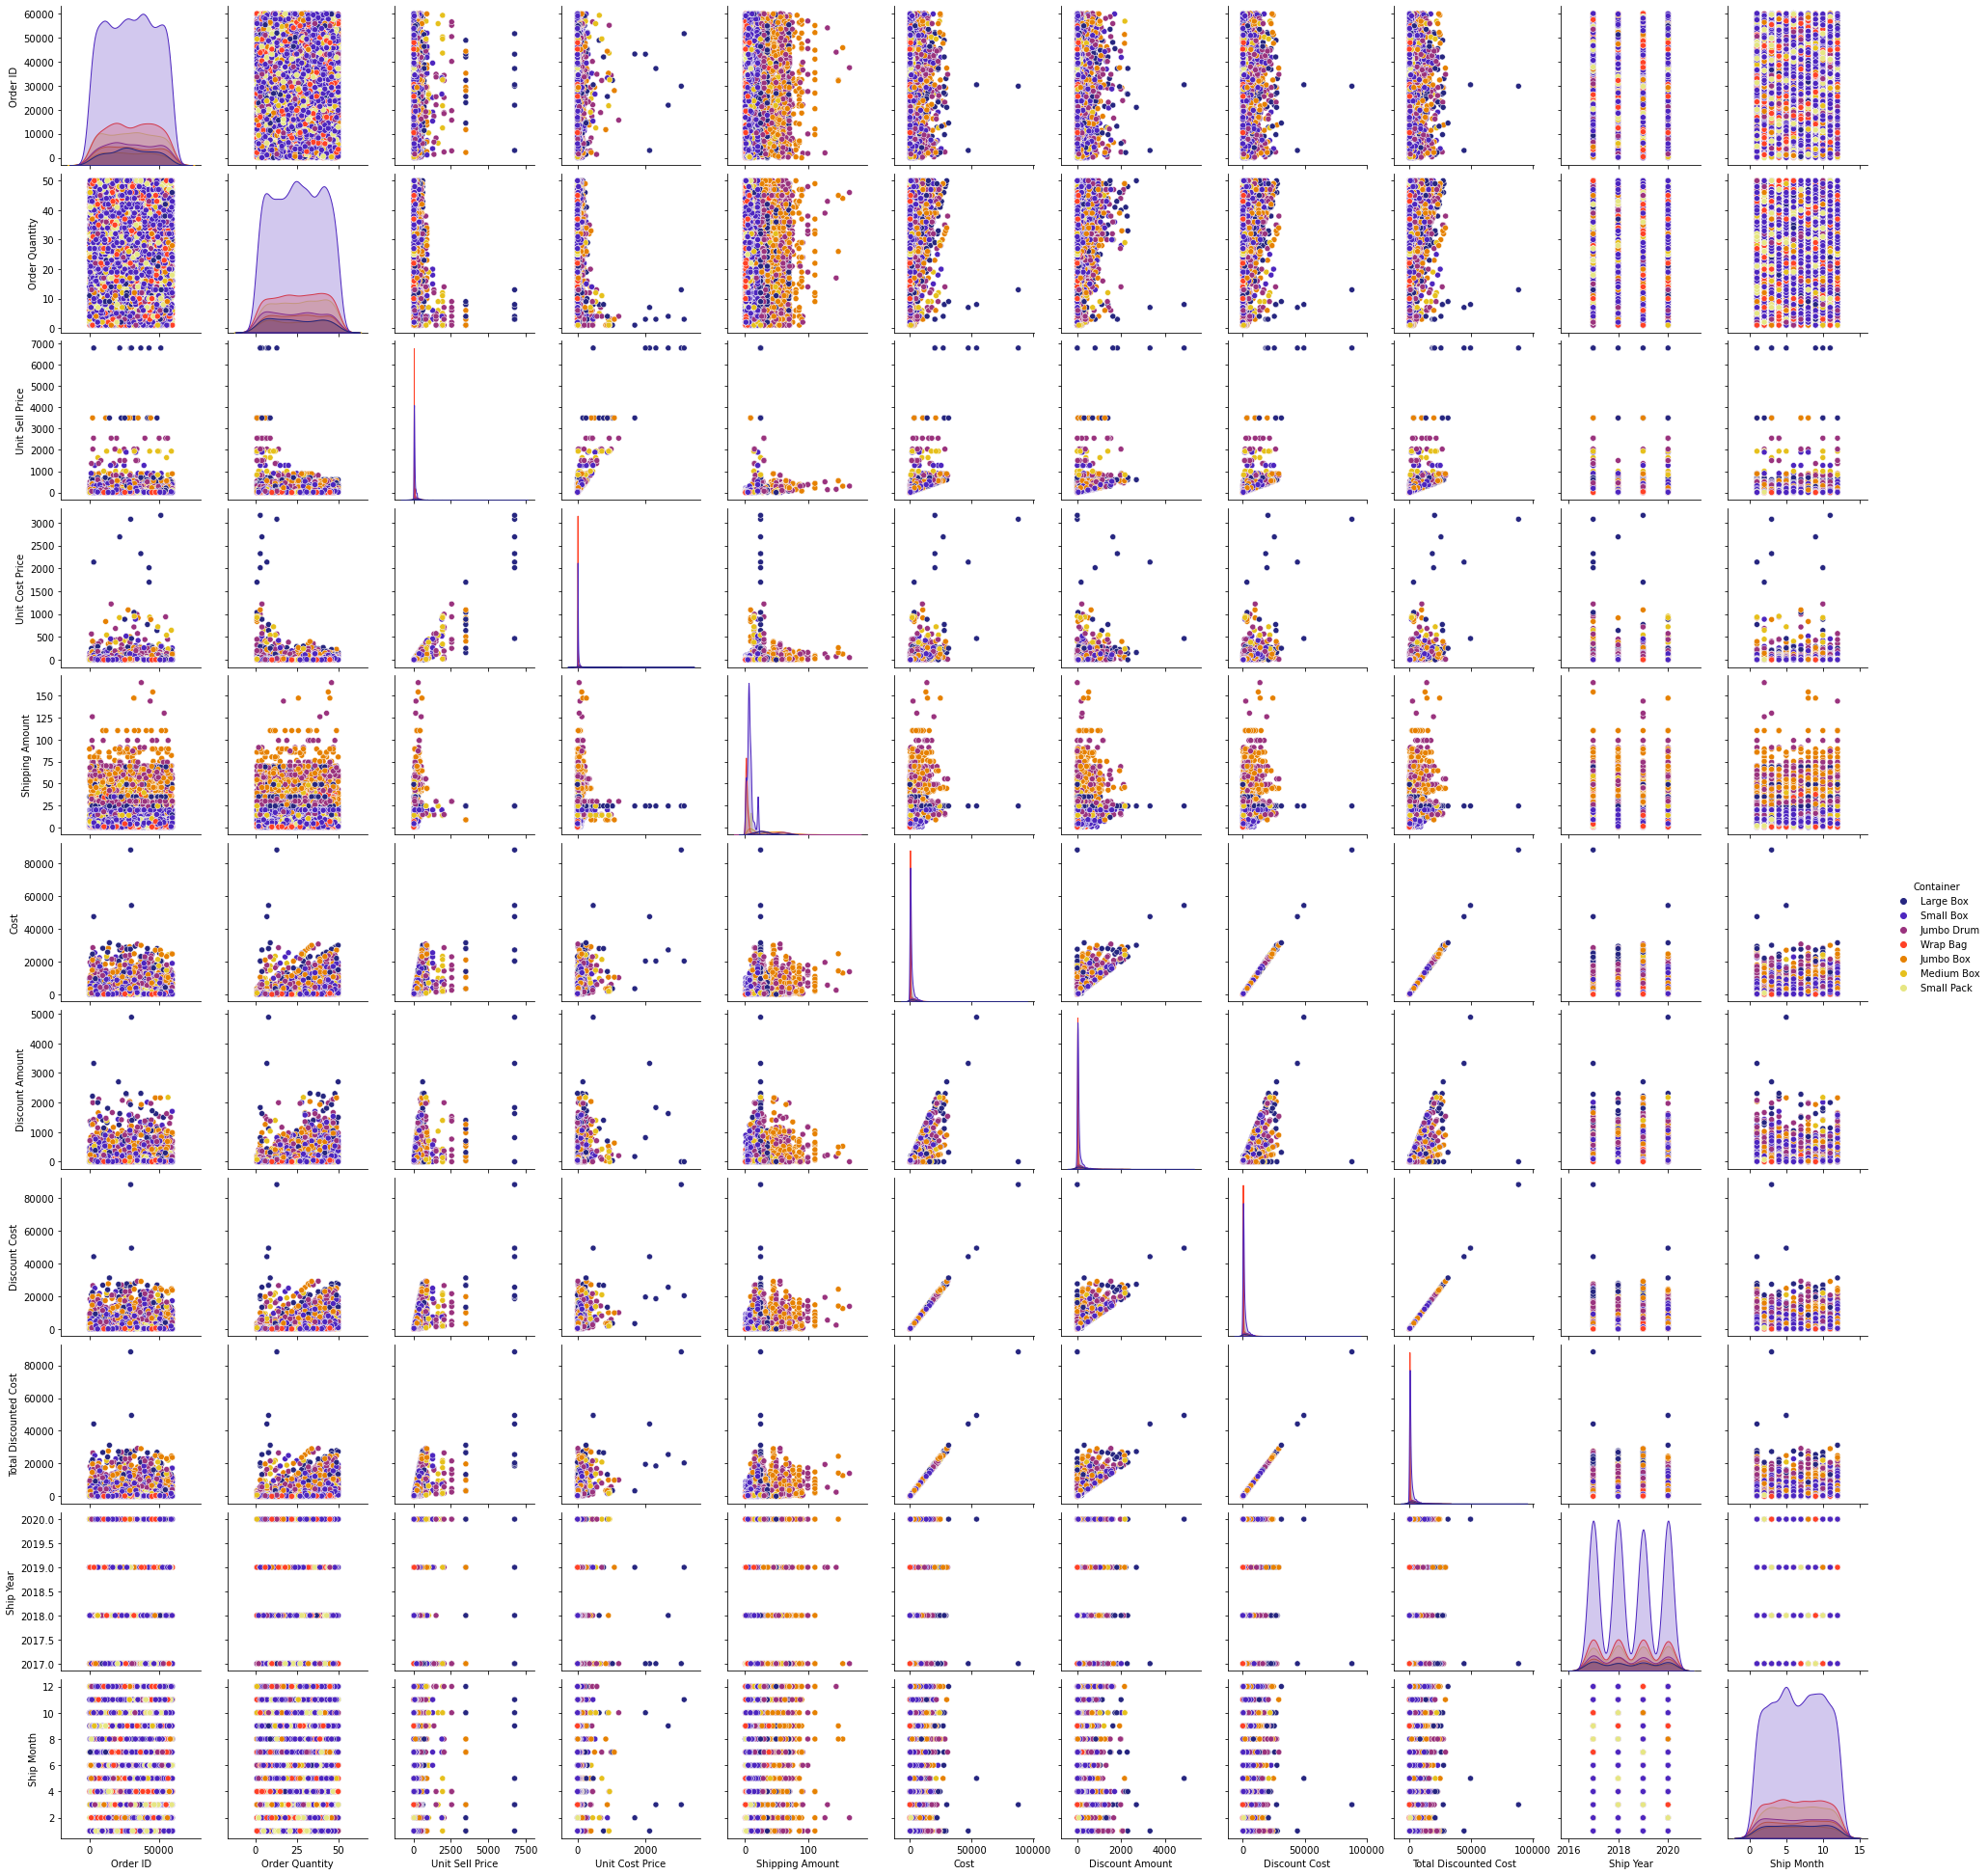

In [27]:
sns.pairplot(df, hue = 'Container', palette = "CMRmap")
plt.show()

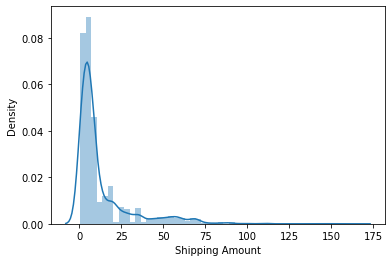

In [29]:
sns.distplot(df['Shipping Amount'])
plt.show()

C:\Users\Damilola Ayodele\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


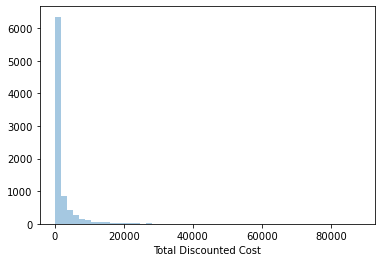

In [30]:
sns.distplot(df['Total Discounted Cost'], kde = False)
plt.show()

As seen in below, small box containers are the most used means of delivery regardless of the shipping mode

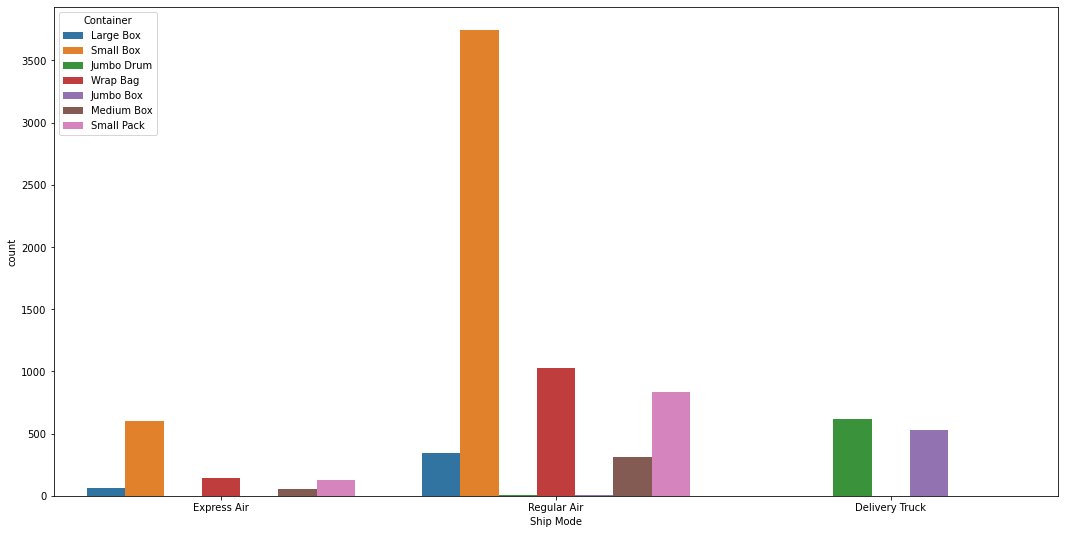

In [41]:
plt.figure(figsize = (18,9))
sns.countplot(x= 'Ship Mode', hue = 'Container', data = df)
plt.show()

The box plot below shows that with regards to shipping amount and container there are sevreal outliers but this can be attributed to the order quatity

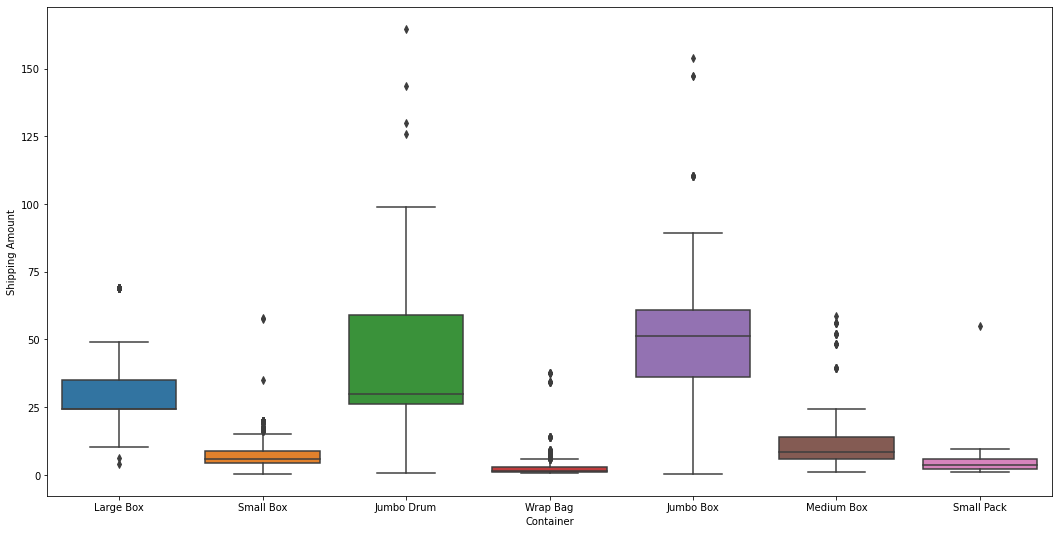

In [32]:
plt.figure(figsize = (18,9))
sns.boxplot(x = "Container", y = "Shipping Amount", data = df)
plt.show()

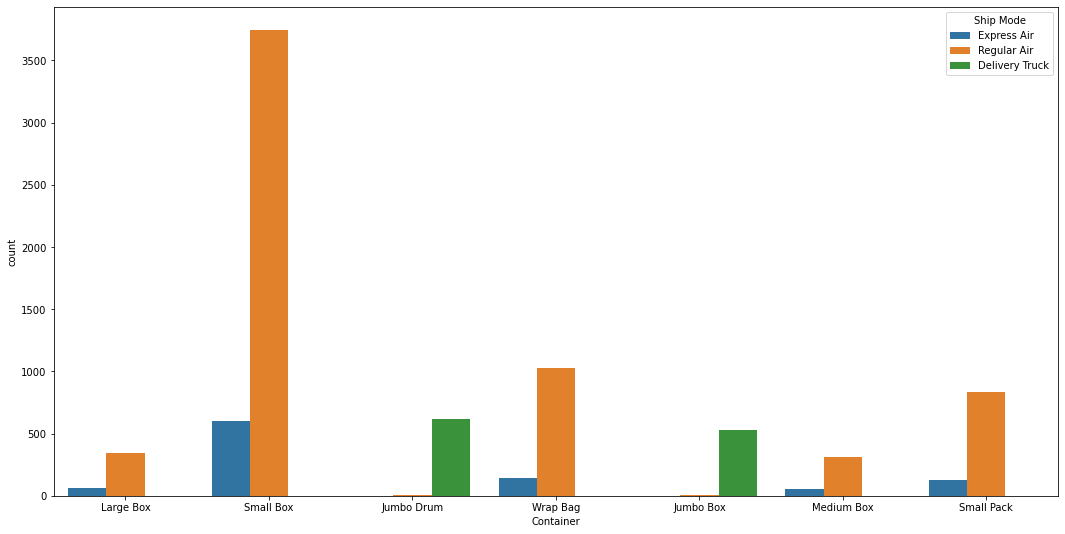

In [33]:
plt.figure(figsize = (18,9))
sns.countplot(x = "Container", hue = "Ship Mode", data = df)
plt.show()

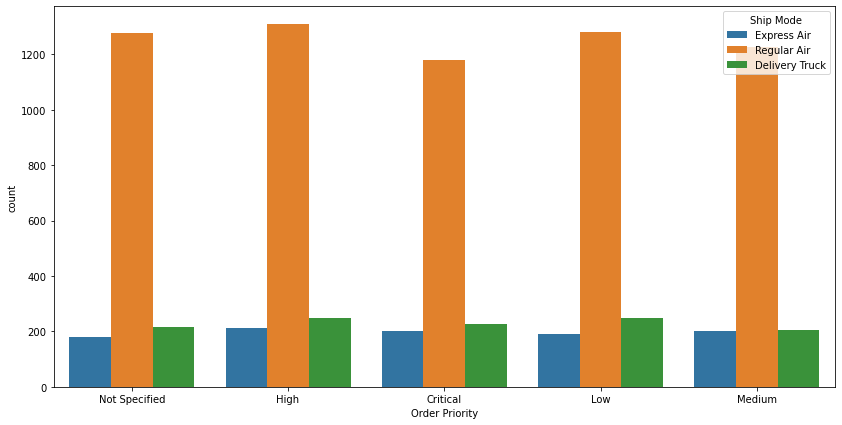

In [34]:
plt.figure(figsize = (14,7))
sns.countplot(x = "Order Priority", hue = "Ship Mode", data = df)
plt.show()

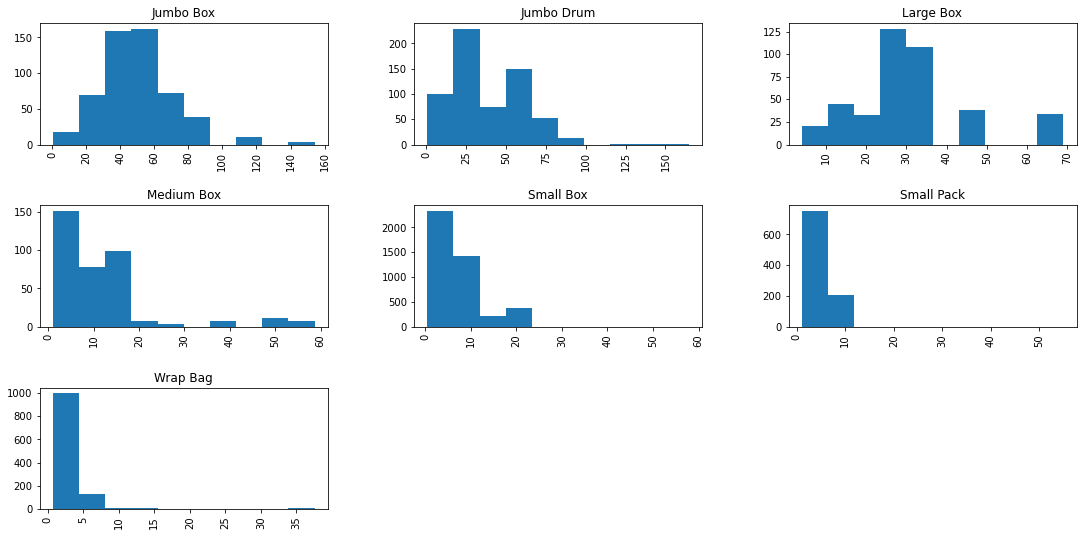

In [35]:
df.hist(by = "Container", column = "Shipping Amount", figsize =( 18,9))
plt.show()

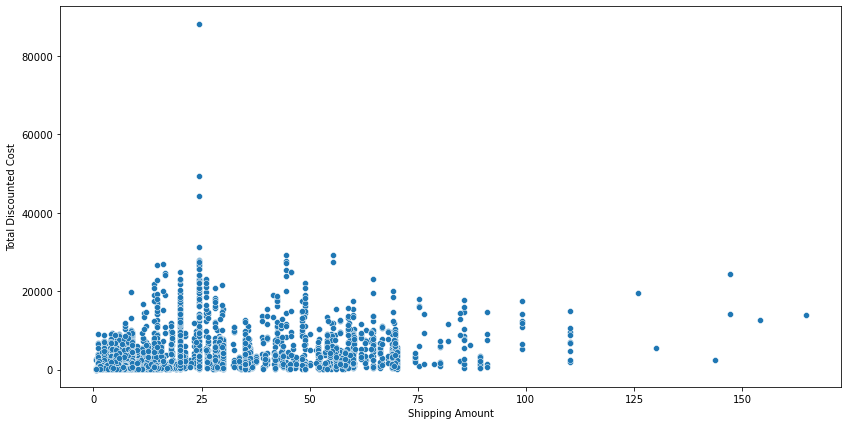

In [36]:
plt.figure(figsize = (14,7))
sns.scatterplot(x = "Shipping Amount", y = "Total Discounted Cost", data = df)
plt.show()

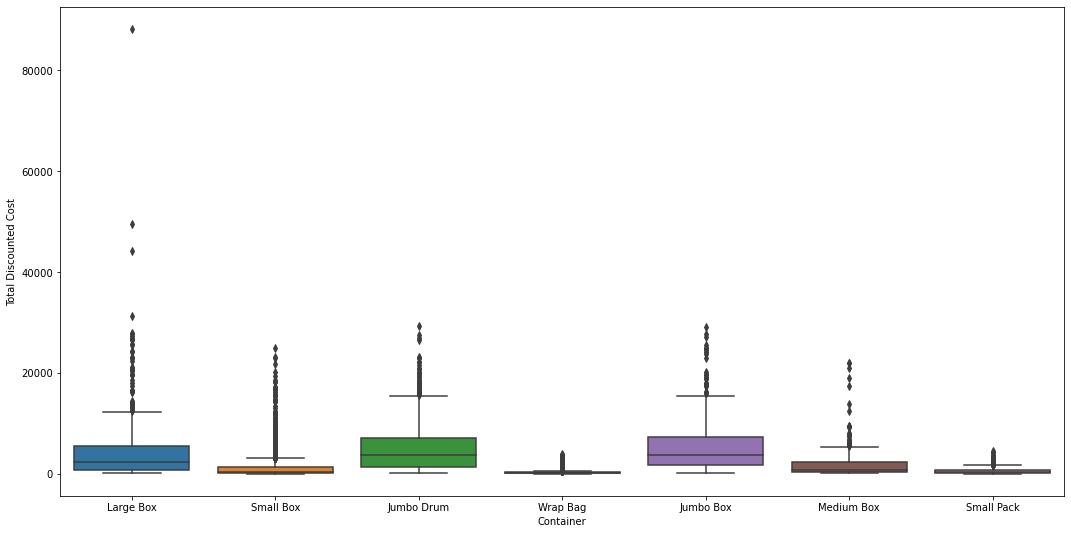

In [37]:
plt.figure(figsize = (18,9))
sns.boxplot(x = "Container", y = "Total Discounted Cost", data = df)
plt.show()

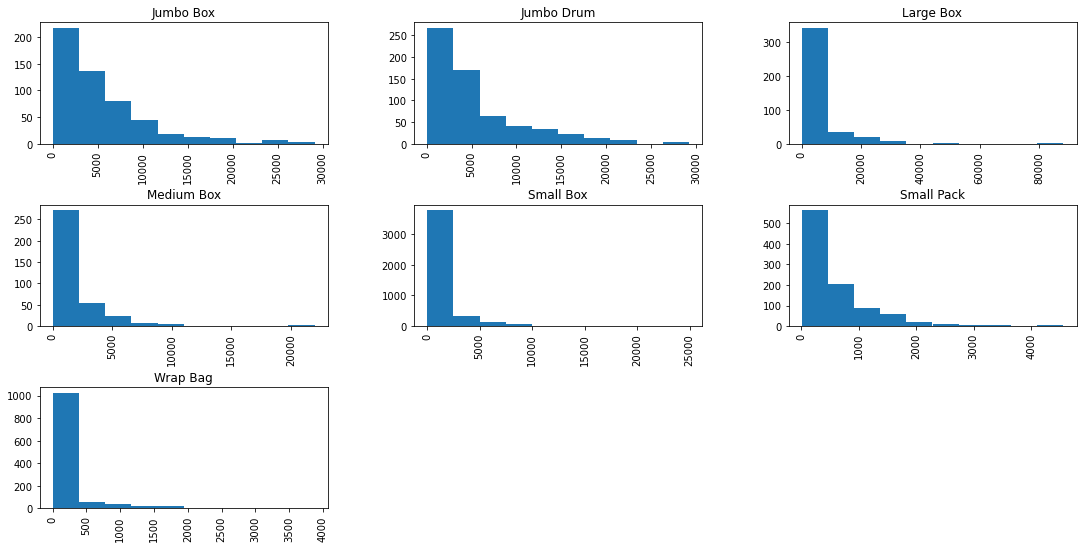

In [38]:
df.hist(by = "Container", column = "Total Discounted Cost", figsize =( 18,9))
plt.show()

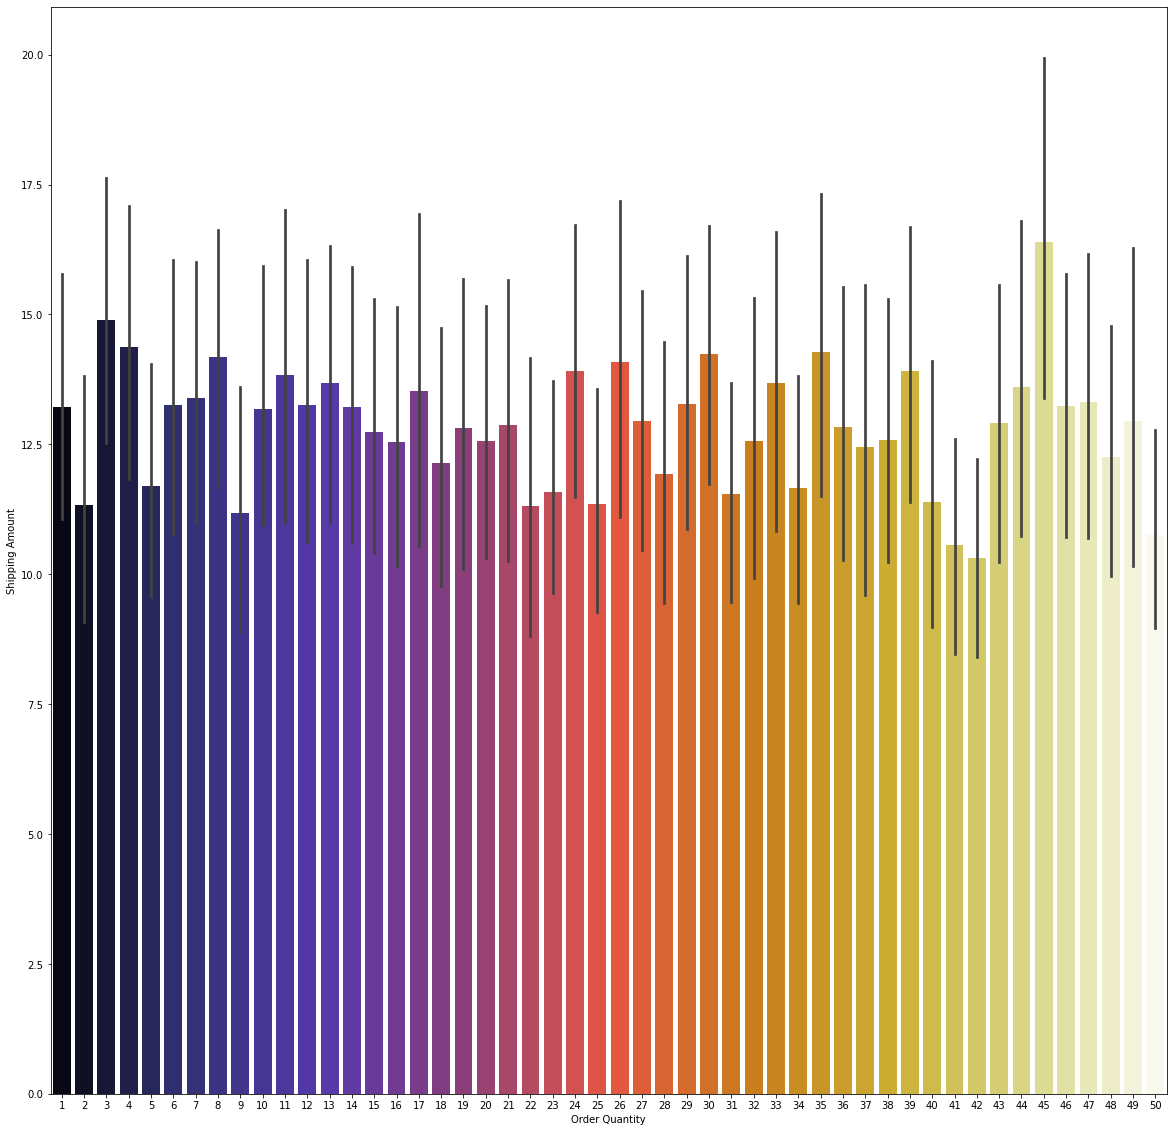

In [39]:
plt.figure(figsize = (20,20))
sns.barplot(x = 'Order Quantity', y = 'Shipping Amount', data = df, palette = "CMRmap")
plt.show()

In [14]:
con_cols = ['Cost', 'Discount Amount', 'Discount Cost', 'Total Discounted Cost', 'Unit Sell Price', 'Shipping Amount', 'Order Quantity', 'Unit Cost Price']
con_df = df[con_cols]

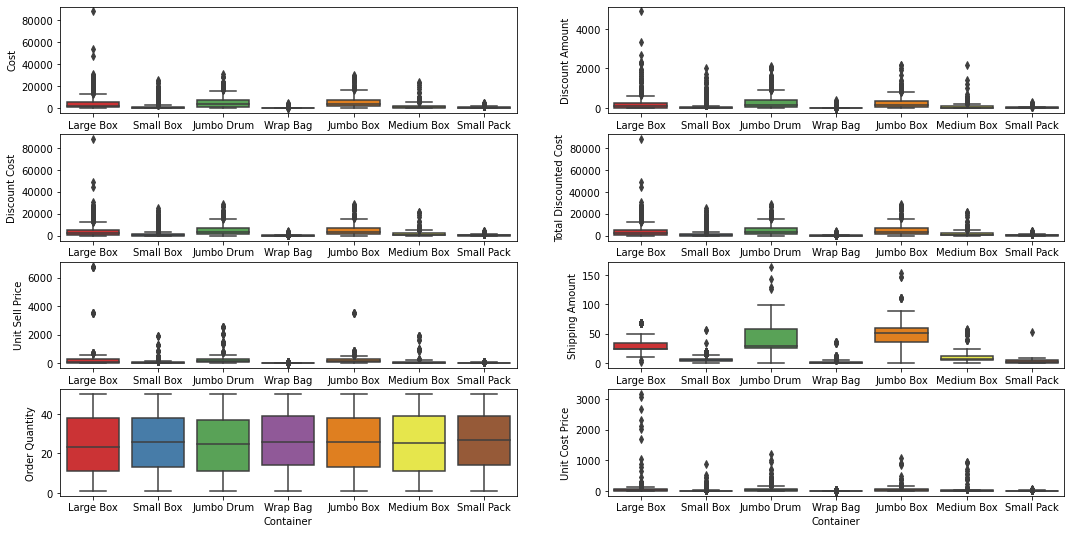

In [18]:
plt.figure(figsize= (18,9))
for i in range (8):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x="Container", y=con_features.columns[i], data=con_features, palette="Set1")
plt.show()

In [15]:
con_features = df[con_cols].astype(int)

In [16]:
con_features["Container"] = df['Container']

In [17]:
con_features.dtypes

Cost                      int32
Discount Amount           int32
Discount Cost             int32
Total Discounted Cost     int32
Unit Sell Price           int32
Shipping Amount           int32
Order Quantity            int32
Unit Cost Price           int32
Container                object
dtype: object

In [42]:
import datetime as dt
df["Ship Day"]=df['Ship Date'].dt.day_name()
df['Ship Year']=df['Ship Date'].dt.year
df['Ship Month']=df['Ship Date'].dt.month

In [21]:
df

,Order ID,Customer ID,Sales Person,Order Date,Ship Date,Order Priority,SKU Code,Order Quantity,Unit Sell Price,Unit Cost Price,...,Shipping Amount,Ship Mode,Container,Cost,Discount Amount,Discount Cost,Total Discounted Cost,Ship Day,Ship Year,Ship Month
0,13729,C508,Mr Robert Carlton,2017-01-01,2017-01-03,Not Specified,SKU947,9,95.99,1,...,35.00,Express Air,Large Box,863.91,69.1128,794.7972,829.7972,Tuesday,2017,1
1,28774,C372,Miss Roseanna Marr,2017-01-01,2017-01-02,High,SKU937,32,5.98,1,...,4.69,Regular Air,Small Box,191.36,19.1360,172.2240,176.9140,Monday,2017,1
2,9285,C212,Mr Robert Carlton,2017-01-02,2017-01-04,Critical,SKU363,3,40.98,6,...,2.99,Regular Air,Small Box,122.94,7.3764,115.5636,118.5536,Wednesday,2017,1
3,37537,C015,Mr Robert Carlton,2017-01-02,2017-01-02,Low,SKU052,4,291.73,58,...,48.80,Delivery Truck,Jumbo Drum,1166.92,0.0000,1166.9200,1215.7200,Monday,2017,1
4,37537,C015,Mr Robert Carlton,2017-01-02,2017-01-04,Low,SKU063,43,100.98,45,...,45.00,Delivery Truck,Jumbo Drum,4342.14,303.9498,4038.1902,4083.1902,Wednesday,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,49344,C494,Mr Robert Carlton,2020-12-30,2020-12-30,Low,SKU979,31,19.98,9,...,4.00,Regular Air,Small Box,619.38,0.0000,619.3800,623.3800,Wednesday,2020,12
8395,49344,C494,Mr Robert Carlton,2020-12-30,2020-12-30,Low,SKU883,1,832.81,14,...,24.49,Regular Air,Medium Box,832.81,74.9529,757.8571,782.3471,Wednesday,2020,12
8396,47815,C377,Mrs Gail Johnson,2020-12-30,2020-12-30,Not Specified,SKU114,45,13.73,5,...,6.85,Regular Air,Wrap Bag,617.85,49.4280,568.4220,575.2720,Wednesday,2020,12
8397,50950,C768,Mrs Gail Johnson,2020-12-30,2020-12-30,Not Specified,SKU066,6,60.98,5,...,30.00,Delivery Truck,Jumbo Drum,365.88,21.9528,343.9272,373.9272,Wednesday,2020,12


C:\Users\Damilola Ayodele\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


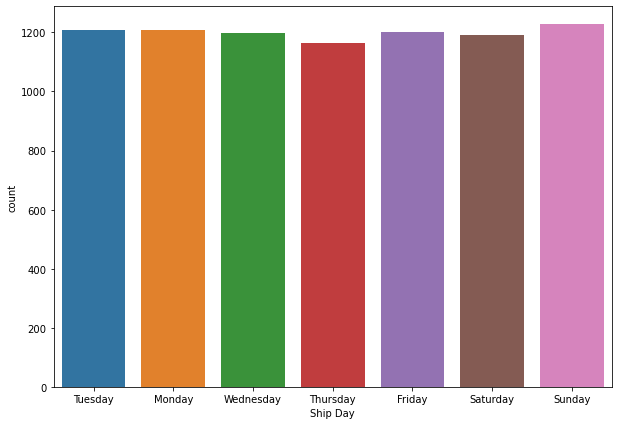

In [22]:
plt.figure(figsize=(10,7))
sns.countplot(df["Ship Day"])
plt.show()

In [23]:
ship_day = df.groupby('Ship Day')['Discount Amount', 'Discount Cost', 'Total Discounted Cost', 'Unit Sell Price', 'Shipping Amount'].mean().round(2)
ship_day

C:\Users\DAMILO~1\AppData\Local\Temp/ipykernel_6408/13918225.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ship_day = df.groupby('Ship Day')['Discount Amount', 'Discount Cost', 'Total Discounted Cost', 'Unit Sell Price', 'Shipping Amount'].mean().round(2)


,Discount Amount,Discount Cost,Total Discounted Cost,Unit Sell Price,Shipping Amount
Ship Day,,,,,
Friday,91.21,1807.45,1820.38,98.31,12.94
Monday,89.07,1610.66,1623.62,81.23,12.95
Saturday,89.58,1769.72,1782.30,95.57,12.58
Sunday,83.50,1739.67,1752.18,85.18,12.51
Thursday,95.18,1659.13,1671.35,77.46,12.22
Tuesday,97.49,1844.80,1858.31,88.04,13.51
Wednesday,93.15,1851.89,1865.03,99.50,13.14


In [21]:
corr = df.corr()
corr

,Order ID,Order Quantity,Unit Sell Price,Unit Cost Price,Shipping Amount,Cost,Discount Amount,Discount Cost,Total Discounted Cost
Order ID,1.000000,0.010953,-0.004303,0.001345,-0.004582,-0.009018,-0.007189,-0.009010,-0.009014
Order Quantity,0.010953,1.000000,-0.104284,-0.090344,-0.011457,0.223229,0.182833,0.222729,0.222207
Unit Sell Price,-0.004303,-0.104284,1.000000,0.886859,0.239959,0.610210,0.485431,0.609732,0.609626
Unit Cost Price,0.001345,-0.090344,0.886859,1.000000,0.194791,0.501804,0.347719,0.504607,0.504501
Shipping Amount,-0.004582,-0.011457,0.239959,0.194791,1.000000,0.427822,0.344250,0.427244,0.431221
Cost,-0.009018,0.223229,0.610210,0.501804,0.427822,1.000000,0.794355,0.999288,0.999283
Discount Amount,-0.007189,0.182833,0.485431,0.347719,0.344250,0.794355,1.000000,0.770877,0.770942
Discount Cost,-0.009010,0.222729,0.609732,0.504607,0.427244,0.999288,0.770877,1.000000,0.999990
Total Discounted Cost,-0.009014,0.222207,0.609626,0.504501,0.431221,0.999283,0.770942,0.999990,1.000000


In [40]:
sh_corr = df["Shipping Amount"].corr()
sh_corr

TypeError: corr() missing 1 required positional argument: 'other'

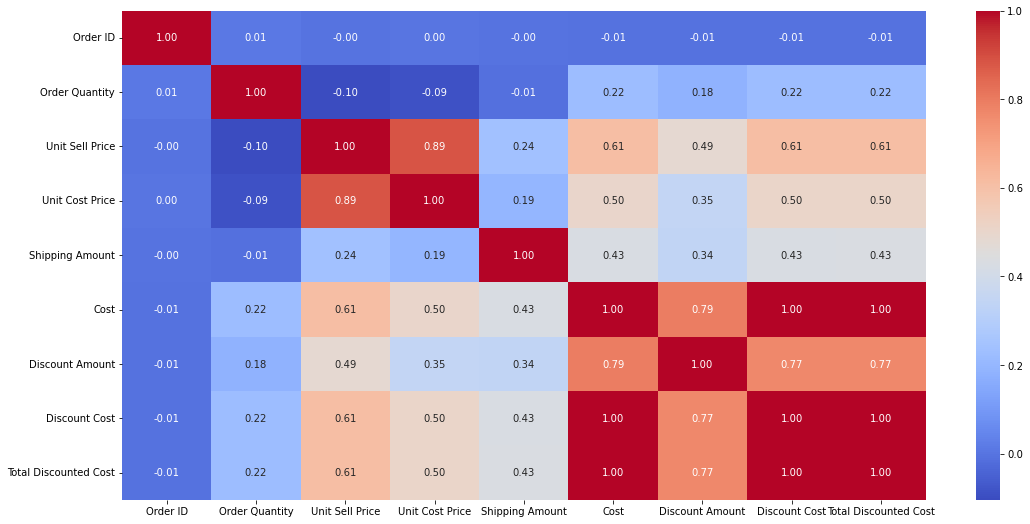

In [26]:
plt.figure(figsize = (18,9))
sns.heatmap(corr, annot = True, fmt =".2f", cmap = "coolwarm")
plt.show()

In [26]:
conn = df.drop(["Shipping Amount", 'Order Date', 'Ship Date'], axis = 1)
conn

,Order ID,Customer ID,Sales Person,Order Priority,SKU Code,Order Quantity,Unit Sell Price,Unit Cost Price,Discount Percent,Ship Mode,Container,Cost,Discount Amount,Discount Cost,Total Discounted Cost
0,13729,C508,Mr Robert Carlton,Not Specified,SKU947,9,95.99,1,8%,Express Air,Large Box,863.91,69.1128,794.7972,829.7972
1,28774,C372,Miss Roseanna Marr,High,SKU937,32,5.98,1,10%,Regular Air,Small Box,191.36,19.1360,172.2240,176.9140
2,9285,C212,Mr Robert Carlton,Critical,SKU363,3,40.98,6,6%,Regular Air,Small Box,122.94,7.3764,115.5636,118.5536
3,37537,C015,Mr Robert Carlton,Low,SKU052,4,291.73,58,0%,Delivery Truck,Jumbo Drum,1166.92,0.0000,1166.9200,1215.7200
4,37537,C015,Mr Robert Carlton,Low,SKU063,43,100.98,45,7%,Delivery Truck,Jumbo Drum,4342.14,303.9498,4038.1902,4083.1902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,49344,C494,Mr Robert Carlton,Low,SKU979,31,19.98,9,0%,Regular Air,Small Box,619.38,0.0000,619.3800,623.3800
8395,49344,C494,Mr Robert Carlton,Low,SKU883,1,832.81,14,9%,Regular Air,Medium Box,832.81,74.9529,757.8571,782.3471
8396,47815,C377,Mrs Gail Johnson,Not Specified,SKU114,45,13.73,5,8%,Regular Air,Wrap Bag,617.85,49.4280,568.4220,575.2720
8397,50950,C768,Mrs Gail Johnson,Not Specified,SKU066,6,60.98,5,6%,Delivery Truck,Jumbo Drum,365.88,21.9528,343.9272,373.9272


In [27]:
y = df["Shipping Amount"]
X = conn.copy()

for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

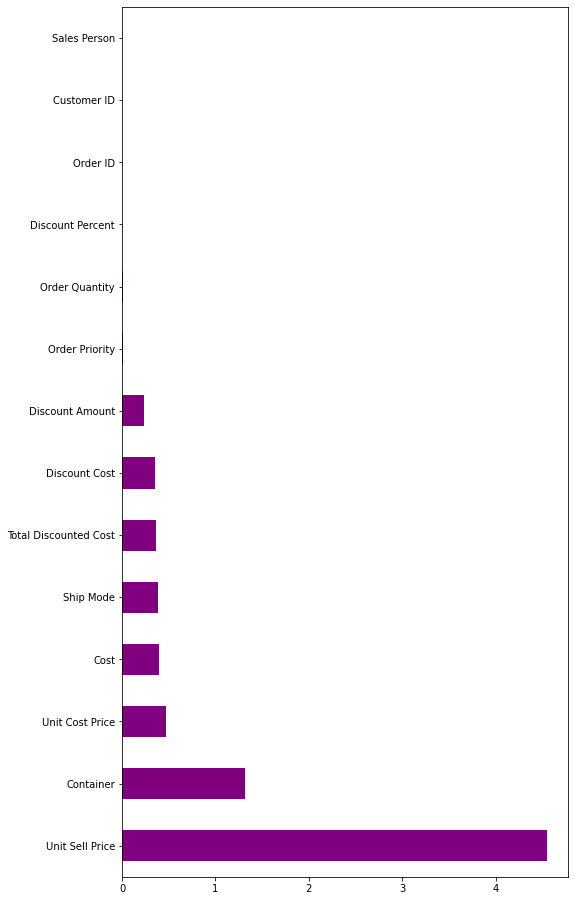

In [28]:
from sklearn.feature_selection import mutual_info_regression

importances = mutual_info_regression(X, y, discrete_features = discrete_features)
feat_importance = pd.Series(importances, index =X.columns)
mi_scores = feat_importance.sort_values(ascending=False)[1:]
plt.figure(figsize = (8, 16))
mi_scores.plot(kind = "barh", color = "purple")
plt.show()

### Preprocessing

In [99]:
mod_cols = ['Cost', 'Discount Amount', 'Discount Cost', 'Total Discounted Cost', 'Unit Sell Price', 'Shipping Amount', 'Unit Cost Price']
int_df = df[mod_cols]

In [100]:
int_df = df[mod_cols].astype(int)

In [101]:
int_df['Discount Percent'] = df['Discount Percent'].apply(lambda x: x.split('%')[0]).astype(int)*0.01
int_df

,Cost,Discount Amount,Discount Cost,Total Discounted Cost,Unit Sell Price,Shipping Amount,Order Quantity,Unit Cost Price,Discount Percent
0,863,69,794,829,95,35,9,1,0.08
1,191,19,172,176,5,4,32,1,0.10
2,122,7,115,118,40,2,3,6,0.06
3,1166,0,1166,1215,291,48,4,58,0.00
4,4342,303,4038,4083,100,45,43,45,0.07
...,...,...,...,...,...,...,...,...,...
8394,619,0,619,623,19,4,31,9,0.00
8395,832,74,757,782,832,24,1,14,0.09
8396,617,49,568,575,13,6,45,5,0.08
8397,365,21,343,373,60,30,6,5,0.06


In [102]:
cols_obj = ['Container', 'Ship Mode', 'Customer ID', 'Order Priority']
obj_df = df[cols_obj]
obj_df

,Container,Ship Mode,Customer ID,Order Priority
0,Large Box,Express Air,C508,Not Specified
1,Small Box,Regular Air,C372,High
2,Small Box,Regular Air,C212,Critical
3,Jumbo Drum,Delivery Truck,C015,Low
4,Jumbo Drum,Delivery Truck,C015,Low
...,...,...,...,...
8394,Small Box,Regular Air,C494,Low
8395,Medium Box,Regular Air,C494,Low
8396,Wrap Bag,Regular Air,C377,Not Specified
8397,Jumbo Drum,Delivery Truck,C768,Not Specified


In [105]:
obj_df['Customer ID'].value_counts()[:40]

C199    41
C248    38
C100    35
C131    33
C591    30
C769    29
C461    28
C405    28
C497    28
C346    28
C582    28
C307    28
C005    27
C310    27
C224    27
C014    27
C263    27
C668    27
C162    26
C322    26
C660    26
C708    26
C619    25
C089    25
C489    25
C186    25
C602    24
C458    24
C733    24
C253    24
Name: Customer ID, dtype: int64

In [91]:
obj_df

,Container,Ship Mode,Discount Percent,Customer ID,Order Priority
0,Large Box,Express Air,0.08,C508,Not Specified
1,Small Box,Regular Air,0.10,C372,High
2,Small Box,Regular Air,0.06,C212,Critical
3,Jumbo Drum,Delivery Truck,0.00,C015,Low
4,Jumbo Drum,Delivery Truck,0.07,C015,Low
...,...,...,...,...,...
8394,Small Box,Regular Air,0.00,C494,Low
8395,Medium Box,Regular Air,0.09,C494,Low
8396,Wrap Bag,Regular Air,0.08,C377,Not Specified
8397,Jumbo Drum,Delivery Truck,0.06,C768,Not Specified


In [ ]:
int_df

## Building Models